<h1>Multi Digit Recognition using Keras</h1>

In [1]:
import keras
import numpy as np
import os
from keras.utils import np_utils
from six.moves import cPickle as pickle
from matplotlib import pyplot as plt
from keras import models
from keras.layers import Dense, Convolution2D, Dropout, Activation, Flatten, MaxPool2D, Input, Conv2D, Add, BatchNormalization
from keras.layers import SeparableConv2D, DepthwiseConv2D, ReLU, AvgPool2D, GlobalAveragePooling2D

from keras.utils import plot_model
from keras.models import Model, Sequential
from keras import backend as K
import pydot

Using TensorFlow backend.


In [3]:
def read_pickled(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    f.close()
    return data

In [4]:
def initialize_data(dataset_dir):
    train_dataset_filename = os.path.join(dataset_dir, 'train_dataset', 'dataset.pickle')
    valid_dataset_filename = os.path.join(dataset_dir, 'valid_dataset', 'dataset.pickle')
    test_dataset_filename = os.path.join(dataset_dir, 'test_dataset', 'dataset.pickle')

    train_labels_filename = os.path.join(dataset_dir, 'train_dataset', 'labels.pickle')
    valid_labels_filename = os.path.join(dataset_dir, 'valid_dataset', 'labels.pickle')
    test_labels_filename = os.path.join(dataset_dir, 'test_dataset', 'labels.pickle')

    train_dataset = read_pickled(train_dataset_filename)
    valid_dataset = read_pickled(valid_dataset_filename)
    test_dataset = read_pickled(test_dataset_filename)

    train_labels = read_pickled(train_labels_filename)
    valid_labels = read_pickled(valid_labels_filename)
    test_labels = read_pickled(test_labels_filename)

    return train_dataset, valid_dataset, test_dataset, train_labels, valid_labels, test_labels

<h2>Read Dataset and Labels</h2>

In [5]:
image_height = 100
image_width = 200
num_class = [4, 11, 11, 11, 11]
num_channels = 1

root = '.'
dataset_dir = os.path.join(root, 'generated', 'create_samples_7')
train_dataset, valid_dataset, test_dataset, train_labels, valid_labels, test_labels = initialize_data(dataset_dir)

<h2>Reformat Dataset<h3>

In [6]:
train_dataset = train_dataset.reshape(3500, image_height, image_width, 1).astype(np.float32)
valid_dataset = valid_dataset.reshape(350, image_height, image_width, 1).astype(np.float32)
test_dataset = test_dataset.reshape(350, image_height, image_width, 1).astype(np.float32)

# Num digit
train_labels_0 = np_utils.to_categorical(train_labels[:, 0]-1, 4)
valid_labels_0 = np_utils.to_categorical(valid_labels[:, 0]-1, 4)
test_labels_0 = np_utils.to_categorical(test_labels[:, 0]-1, 4)

# Digit 1
train_labels_1 = np_utils.to_categorical(train_labels[:, 1], 11)
valid_labels_1 = np_utils.to_categorical(valid_labels[:, 1], 11)
test_labels_1 = np_utils.to_categorical(test_labels[:, 1], 11)

# Digit 2
train_labels_2 = np_utils.to_categorical(train_labels[:, 2], 11)
valid_labels_2 = np_utils.to_categorical(valid_labels[:, 2], 11)
test_labels_2 = np_utils.to_categorical(test_labels[:, 2], 11)

# Digit 3
train_labels_3 = np_utils.to_categorical(train_labels[:, 3], 11)
valid_labels_3 = np_utils.to_categorical(valid_labels[:, 3], 11)
test_labels_3 = np_utils.to_categorical(test_labels[:, 3], 11)

# Digit 4
train_labels_4 = np_utils.to_categorical(train_labels[:, 4], 11)
valid_labels_4 = np_utils.to_categorical(valid_labels[:, 4], 11)
test_labels_4 = np_utils.to_categorical(test_labels[:, 4], 11)

In [7]:
print("Reformed Train dataset : %s" % str(train_dataset.shape))
print("Reformed Valid dataset: %s" % str(valid_dataset.shape))
print("Reformed Test dataset: %s" % str(test_dataset.shape))

print("Reformed Train label 0: %s" % str(train_labels_0.shape))
print("Reformed Valid label 0: %s" % str(valid_labels_0.shape))
print("Reformed Test label 0: %s" % str(test_labels_0.shape))

print("Reformed Train label 1: %s" % str(train_labels_1.shape))
print("Reformed Valid label 1: %s" % str(valid_labels_1.shape))
print("Reformed Test label 1: %s" % str(test_labels_1.shape))

print("Reformed Train label 2: %s" % str(train_labels_2.shape))
print("Reformed Valid label 2: %s" % str(valid_labels_2.shape))
print("Reformed Test label 2: %s" % str(test_labels_2.shape))

print("Reformed Train label 3: %s" % str(train_labels_3.shape))
print("Reformed Valid label 3: %s" % str(valid_labels_3.shape))
print("Reformed Test label 3: %s" % str(test_labels_3.shape))

print("Reformed Train label 4: %s" % str(train_labels_4.shape))
print("Reformed Valid label 4: %s" % str(valid_labels_4.shape))
print("Reformed Test label 4: %s" % str(test_labels_4.shape))

Reformed Train dataset : (3500, 100, 200, 1)
Reformed Valid dataset: (350, 100, 200, 1)
Reformed Test dataset: (350, 100, 200, 1)
Reformed Train label 0: (3500, 4)
Reformed Valid label 0: (350, 4)
Reformed Test label 0: (350, 4)
Reformed Train label 1: (3500, 11)
Reformed Valid label 1: (350, 11)
Reformed Test label 1: (350, 11)
Reformed Train label 2: (3500, 11)
Reformed Valid label 2: (350, 11)
Reformed Test label 2: (350, 11)
Reformed Train label 3: (3500, 11)
Reformed Valid label 3: (350, 11)
Reformed Test label 3: (350, 11)
Reformed Train label 4: (3500, 11)
Reformed Valid label 4: (350, 11)
Reformed Test label 4: (350, 11)


<h2>Sanity Checking</h2>

In [8]:
def data_testing(dataset, labels, index):
    data = dataset[index].reshape(image_height, image_width)
    label = labels[index]
    print(label)
    print(data.shape)
    plt.matshow(data)
    plt.show()

[0. 0. 1. 0.]
(100, 200)


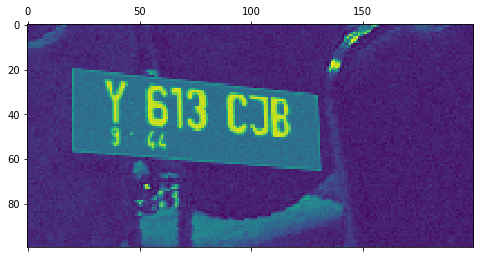

In [11]:
data_testing(train_dataset, train_labels_0, 2335)

In [13]:
mobilenet = keras.applications.mobilenetv2.MobileNetV2(input_shape=(100, 200, 1), weights=None, classes=4)
plot_model(mobilenet, show_shapes=True)

In [20]:
batch_size = 16
loss = {'logits0': 'categorical_crossentropy',
        'logits1': 'categorical_crossentropy',
        'logits2': 'categorical_crossentropy',
        'logits3': 'categorical_crossentropy',
        'logits4': 'categorical_crossentropy'}
metrics = {'logits0': 'accuracy',
           'logits1': 'accuracy',
           'logits2': 'accuracy',
           'logits3': 'accuracy',
           'logits4': 'accuracy'}
loss_weights = {'logits0': 1.0, 
                'logits1': 1.0, 
                'logits2': 1.0, 
                'logits3': 1.0, 
                'logits4': 1.0, }
y = [train_labels_0, 
     train_labels_1, 
     train_labels_2, 
     train_labels_3, 
     train_labels_4]
valid_y = [valid_labels_0, 
           valid_labels_1, 
           valid_labels_2, 
           valid_labels_3, 
           valid_labels_4]
test_y = [test_labels_0, 
          test_labels_1, 
          test_labels_2, 
          test_labels_3, 
          test_labels_4]
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=os.path.join(dataset_dir, 'tensorboard'), batch_size=batch_size, 
                                            histogram_freq=1, write_graph=True, write_grads=True)
mobilenet.compile(loss='sparse_categorical_crossentropy',
                  optimizer=keras.optimizers.adam(lr=.01),
                  metrics=['accuracy'])
mobilenet.fit(x=train_dataset, y=train_labels_0,
              batch_size=batch_size, epochs=10, verbose=1,
              validation_data=(valid_dataset, valid_labels_0),
              callbacks=[tensorboard_cb], )
score = mobilenet.evaluate(test_dataset, test_labels_0, verbose=1)
print('Test loss: ', score[0])
print('Test accuracy', score[1])


ValueError: Error when checking target: expected Logits to have shape (1,) but got array with shape (4,)